<a href="https://colab.research.google.com/github/amoyag/Biofisica/blob/main/session4_BIGmodel_dynamicalcompensation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import Python modules
### Import libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# THE $\beta$IG MODEL OF GLUCOSE REGULATION
## Introduction
The $\beta$IG ($\beta$-cells, Insulin, Glucose) model refers to a mathematical or conceptual framework used to understand and simulate the regulation of glucose levels in the body, particularly in the context of diabetes research. This model typically focuses on three key components:

1. **$\beta$-cells**: These are cells located in the pancreas that produce insulin. The model often includes mechanisms by which these cells sense blood glucose levels and respond accordingly.

2. **Insulin**: This is a hormone produced by $\beta$-cells that plays a crucial role in regulating blood glucose levels. Insulin facilitates the uptake of glucose by cells in the body, thereby reducing blood glucose levels. The model would typically simulate how insulin is secreted in response to blood glucose levels and how it affects glucose uptake.

3. **Glucose**: This is the primary sugar found in the blood and is a major energy source for the body. The model would include how glucose levels change in response to various factors, including food intake, insulin levels, and other physiological processes.

The $\beta$IG model is often used in the study of diabetes, a condition characterized by impaired insulin production (Type 1 diabetes) or insulin resistance (Type 2 diabetes). By simulating how changes in beta-cell function, insulin secretion, and glucose uptake affect overall glucose regulation, researchers can gain insights into the disease process and potential treatments.

The specifics of the $\beta$IG model can vary depending on the research or the specific aspects of glucose regulation being studied. It can range from relatively simple mathematical models to more complex simulations incorporating additional factors like glucagon (another hormone involved in glucose regulation), the role of the liver, and the impact of various medications.

### Insulin sensitivity
Insulin sensitivity refers to how effectively the body's cells respond to insulin. It varies among individuals and can be influenced by various factors including genetics, lifestyle, and health conditions.

- **Genetic Factors**: Genetic makeup can influence insulin sensitivity. Some people may be genetically predisposed to higher insulin sensitivity, while others may have a predisposition to insulin resistance.
- **Lifestyle Factors**:
   - **Diet**: High-calorie diets, especially those rich in sugars and saturated fats, can decrease insulin sensitivity.
   - **Physical Activity**: Regular physical activity increases insulin sensitivity as muscles use more glucose for energy during and after exercise.
   - **Body Weight**: Higher body fat, particularly visceral fat around the abdomen, is associated with decreased insulin sensitivity.
- **Health Conditions**:
   - **Type 2 Diabetes**: This condition is characterized by insulin resistance, where the body's cells do not respond effectively to insulin.
   - **Metabolic Syndrome**: A cluster of conditions including high blood pressure, high blood sugar, excess body fat around the waist, and abnormal cholesterol levels, which are linked to reduced insulin sensitivity.
   - **Polycystic Ovary Syndrome (PCOS)**: Women with PCOS often experience insulin resistance.
- **Age**: Insulin sensitivity generally decreases with age, partly due to loss of muscle mass and increased fat, especially if not countered with physical activity.
- **Hormonal Changes**: Hormonal fluctuations, such as those during pregnancy, can affect insulin sensitivity.

Improving insulin sensitivity can often be achieved through lifestyle changes such as diet modifications, increased physical activity, and weight loss. In some cases, medication may also be required to manage insulin sensitivity, especially in conditions like type 2 diabetes.

In this exercise, we aim you can put together your own analysis of the regulation of glucose levels using the $\beta$IG model and understand how this model explains the resistance of glucose regulation to changes in insulin sensitivity.

### The $\beta$IG model

The Python code below implements the $\beta$IG model, governed by a set of ordinary differential equations (ODEs) that describe how $\beta$-cells, insulin and glucose change over time in response to physiological factors, such as meal intake.

#### Key Components of the Model:

1. **Time-Dependent Meal Function**:
   - This function models the intake of glucose from meals. It provides a temporary increase in glucose levels ($m$) at specific meal times ($meal_time$) for a given duration ($meal_duration$).

2. **ODEs for the BIG Model**:
   - The system is described by three coupled differential equations representing the dynamics of glucose, insulin, and beta-cells.

#### Parameters:
- $m = 20.0$: Glucose input from meals.
- $s = 0.01$: Insulin sensitivity.
- $gamma = 0.8$: Insulin degradation rate.
- $mu = 0$: Growth rate of beta-cells, set to zero in this scenario, indicating a constant beta-cell population.
- $meal\_time = 1$: Time at which meal intake occurs.
- $meal\_duration = 0.15$: Duration of the meal's effect on glucose levels.
- $I0 = 10$: Initial insulin level (µU/mL).
- $G0 = 5.0$: Initial glucose level, representing a typical fasting level (mM).
- $B0 = 1.0$: Initial level of beta-cells.

#### ODEs of the Dynamics:
The model is described by the following differential equations:

1. **Glucose Dynamics**:
   $$ \frac{dG}{dt} = \text{current_m} - (s \cdot I \cdot G) $$
   - $current\_m$ is the glucose input from the meal, calculated by the $meal\_input$ function.
   - $s$ is the insulin sensitivity, and $I$ is the insulin level.

2. **Insulin Dynamics**:
   $$ \frac{dI}{dt} =
   \begin{cases}
   0, & \text{if } t < \text{meal_time} \\
   B \cdot f_G - \gamma \cdot I, & \text{otherwise}
   \end{cases} $$
   $f_G$ represents the insulin production rate, modeled as a function of glucose levels. Before the meal, insulin production is kept constant. It is modeled using a modified sigmoid function, $f(G) = \frac{f_{\text{max}}}{1 + e^{-K \cdot G}}$.  Where $f_{\text{max}}$ is the maximum insulin production rate, $K$ is a constant that determines the glucose level for the half-maximal effect, $G$ is the glucose level.

This form of $f(G)$ provides a sigmoidal response to glucose levels, which is a common way to model the rate at which insulin is produced in response to changing glucose concentrations. The parameters $f_{\text{max}}$ and $K$ can be adjusted to fit the specific characteristics of the insulin response curve for different physiological conditions. You can see the shape of $f(G)$ below.

In [ ]:
#@title f(g)
import numpy as np
import matplotlib.pyplot as plt

# Parameters for f(G)
f_max = 10  # Max insulin production rate
K = 4       # Glucose level for half-maximal effect

# Function f(G)
def f_G(G):
    return f_max / (1 + np.exp(-K * G))

# Generating a range of glucose levels (G)
glucose_levels = np.linspace(0, 5, 100)  # Glucose levels from 0 to 10

# Compute f(G) for each glucose level
insulin_production_rates = f_G(glucose_levels)

# Plotting f(G)
plt.figure(figsize=(5, 3))
plt.plot(glucose_levels, insulin_production_rates, label='f(G)')
plt.xlabel('Glucose Level (G)')
plt.ylabel('Insulin Production Rate')
#plt.title('Insulin Production Rate as a Function of Glucose Level')
#plt.legend()
#plt.grid()

# Removing the frame (spines)
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()




3. **$\beta$-Cell Dynamics**:
   $$ \frac{dB}{dt} = \mu \cdot B $$
   - $\mu$ represents the growth rate of $\beta$-cells. In this scenario, it is set to zero, implying no change in the $\beta$-cell population over time.

This implementation provides a detailed simulation of glucose-insulin dynamics, especially in response to meals, and can be used to study various physiological states, such as normal glucose regulation and conditions like insulin resistance.

This is the first and more important Python function. it contains the definition of the $\beta$IG model. Be sure to run it so you can put together your simulation

In [ ]:
#@title The BIG model
# Define a time-dependent meal function
def meal_input(t, m, meal_time, meal_duration):
    if meal_time <= t < meal_time + meal_duration:
        return m
    else:
        return 0

# Define the ODEs for the BIG model
def BIG_model(y, t, m, s, B, gamma, mu, meal_time, meal_duration, I0):
    G, I, B = y
    f_max = 10   # Max insulin production rate (internal parameter)
    K = 4       # Glucose level for half-maximal effect (internal parameter)
    n = 4       # Hill coefficient (internal parameter)

    # Insulin production model changes after meal
    if t < meal_time:
        dIdt = 0  # Keeping insulin level constant before the meal
    else:
        #f_G = 1.5*G
        #f_G = f_max / (1 + (G/K)**n) # Decreasing Hill-type function for f(G)
        f_G = f_max / (1 + np.exp(-K * G))
        dIdt = B * f_G - gamma * I

    current_m = meal_input(t, m, meal_time, meal_duration)  # Get current meal input
    dGdt = current_m - (s * I * G)
    dBdt = mu * B
    return [dGdt, dIdt, dBdt]




In [45]:
#@title The BIG model. Definition for all simulations
def add_param_box(plt, params):
    param_text = '\n'.join(f'{k}: {v}' for k, v in params.items())
    plt.text(0.98, 0.02, param_text,
             transform=plt.gca().transAxes,
             verticalalignment='bottom',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

def run_BIG_simulation(m, s, gamma, mu, meal_time, meal_duration, I0):
    # Initial conditions
    G0 = 5.0    # Initial glucose level (mM), typical fasting level
    B0 = 1.0    # Initial beta-cell level
    t = np.linspace(0, 5, 100)  # 10 hours simulation

    # Solve ODEs
    solution = odeint(BIG_model, [G0, I0, B0], t, args=(m, s, B0, gamma, mu, meal_time, meal_duration, I0))

    # Plot results
    plt.figure(figsize=(10, 8))
    plt.plot(t, solution[:, 0], label='Glucose (G) [mM]')
    plt.plot(t, solution[:, 1], label='Insulin (I) [µU/mL]')
    plt.plot(t, solution[:, 2], label=r'$\beta$-cells (B)')

    params = {
        'm': m,
        's': s,
        'γ': gamma,
        'μ': mu,
        'meal_time': meal_time,
        'meal_duration': meal_duration,
        'I0': I0
    }
    add_param_box(plt, params)

    plt.xlabel('Time (hours)')
    plt.ylabel('Concentration/Level')
    plt.title(r'Dynamics of the $\beta$IG Model with Meal Input')
    plt.axvline(x=meal_time, color='grey', linestyle='--', label='Meal intake')
    plt.legend()
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()

def run_BIG_simulation_analysis(m, gamma, mu, meal_time, meal_duration, I0):
    s_values = np.linspace(0.001, 0.01, 2)
    G0 = 5.0
    B0 = 1.0
    t = np.linspace(0, 5, 100)

    plt.figure(figsize=(10, 8))

    for s in s_values:
        solution = odeint(BIG_model, [G0, I0, B0], t, args=(m, s, B0, gamma, mu, meal_time, meal_duration, I0))
        plt.plot(t, solution[:, 0], label=f's = {s:.3f}')

    params = {
        'm': m,
        'γ': gamma,
        'μ': mu,
        'meal_time': meal_time,
        'meal_duration': meal_duration,
        'I0': I0
    }
    add_param_box(plt, params)

    plt.xlabel('Time (hours)')
    plt.ylabel('Glucose (G) [mM]')
    plt.title('Glucose Levels for Different Insulin Sensitivities')
    plt.axvline(x=meal_time, color='grey', linestyle='--', label='Meal intake')
    plt.legend()
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()

def run_extended_simulation(m, s_values, gamma, meal_time, meal_duration, I0, B0, num_days):
    plt.figure(figsize=(15, 10))

    plot_styles = {s_values[0]: {'color': 'blue', 'linestyle': '-'}}

    for s in s_values:
        B = B0
        for day in range(num_days):
            G0 = 5.0
            day_start = day * 24
            day_end = day_start + meal_time + 5
            t_day = np.linspace(day_start, day_end, int((meal_time + 5) * 10))

            day_solution = odeint(BIG_model, [G0, I0, B], t_day,
                                args=(m, s, B, gamma, 0, meal_time + day*24, meal_duration, I0))

            plt.plot(t_day, day_solution[:, 0], label=f's = {s:.4f}' if day == 0 else "",
                     color=plot_styles[s]['color'], linestyle=plot_styles[s]['linestyle'])

            plt.axvline(x=meal_time + day*24, color='grey', linestyle='--')

    params = {
        'm': m,
        's': s_values[0],
        'γ': gamma,
        'meal_time': meal_time,
        'meal_duration': meal_duration,
        'I0': I0,
        'B0': B0
    }
    add_param_box(plt, params)

    plt.xlabel('Time (hours)')
    plt.ylabel('Glucose (G) [mM]')
    plt.title('Extended Glucose Levels')
    plt.ylim(bottom=4)
    plt.legend()
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()

def run_extended_simulation_s(m, s_values, gamma, meal_time, meal_duration, I0, B0, num_days):
    plt.figure(figsize=(15, 10))

    plot_styles = {
        s_values[0]: {'color': 'blue', 'linestyle': '-'},
        s_values[1]: {'color': 'red', 'linestyle': '--'}
    }

    for s in s_values:
        B = B0
        for day in range(num_days):
            G0 = 5.0
            day_start = day * 24
            day_end = day_start + meal_time + 5
            t_day = np.linspace(day_start, day_end, int((meal_time + 5) * 10))

            day_solution = odeint(BIG_model, [G0, I0, B], t_day,
                                args=(m, s, B, gamma, 0, meal_time + day*24, meal_duration, I0))

            plt.plot(t_day, day_solution[:, 0], label=f's = {s:.4f}' if day == 0 else "",
                     color=plot_styles[s]['color'], linestyle=plot_styles[s]['linestyle'])

            plt.axvline(x=meal_time + day*24, color='grey', linestyle='--')

    params = {
        'm': m,
        's1': s_values[0],
        's2': s_values[1],
        'γ': gamma,
        'meal_time': meal_time,
        'meal_duration': meal_duration,
        'I0': I0,
        'B0': B0
    }
    add_param_box(plt, params)

    plt.xlabel('Time (hours)')
    plt.ylabel('Glucose (G) [mM]')
    plt.title('Extended Glucose Levels for Different Insulin Sensitivities')
    plt.ylim(bottom=4)
    plt.legend()
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()

def compensation_simulation(m, s_resistant, gamma, meal_time, meal_duration, I0, B0, num_days, s_optimal):
    plt.figure(figsize=(15, 10))

    B_target = B0 * s_optimal / s_resistant
    mu = (B_target / B0) ** (1 / num_days) - 1

    plt.plot([], [], ' ', label=f's = {s_resistant:.4f}')

    for day in range(num_days):
        B = B0 * (1 + mu) ** day
        G0 = 5.0
        day_start = day * 24
        day_end = day_start + meal_time + 5
        t_day = np.linspace(day_start, day_end, int((meal_time + 5) * 10))

        day_solution = odeint(BIG_model, [G0, I0, B], t_day,
                            args=(m, s_resistant, B, gamma, 0, meal_time + day*24, meal_duration, I0))

        plt.plot(t_day, day_solution[:, 0], color='red', label=f'Day {day+1}, B = {B:.2f}')
        plt.axvline(x=meal_time + day*24, color='grey', linestyle='--')

    params = {
        'm': m,
        's_resistant': s_resistant,
        's_optimal': s_optimal,
        'γ': gamma,
        'meal_time': meal_time,
        'meal_duration': meal_duration,
        'I0': I0,
        'B0': B0,
        'μ': mu
    }
    add_param_box(plt, params)

    plt.xlabel('Time (hours)')
    plt.ylabel('Glucose (G) [mM]')
    plt.title(r'Glucose Levels with $\beta$-Cell Compensation ($s_{resistant} = ' + f'{s_resistant}' + r', B_0 = ' + f'{B0}' + r'$)')
    plt.ylim(bottom=4)
    plt.legend()
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()

#### How to run the simulations of the $\beta$IG model
The code below load the corresponding simulation of the $\beta$IG model above, solve the ODEs and plot the results.


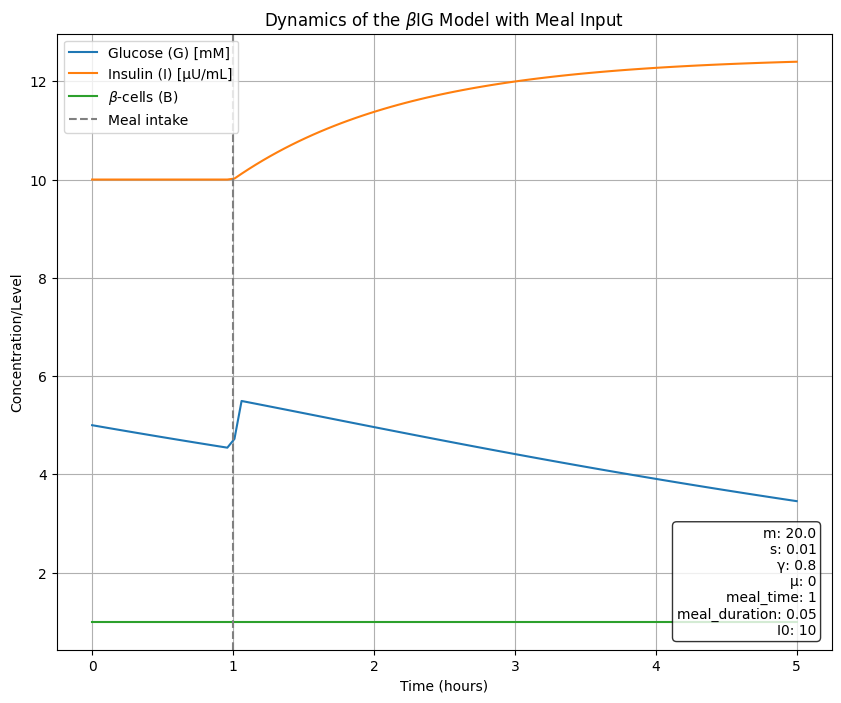

In [57]:
#@title Running the BIG model
run_BIG_simulation(m=20.0, s=0.01, gamma=0.8, mu=0 , meal_time=1, meal_duration=0.05, I0=10)


### Simple simulation with two values of insulin sensitivity
This simulation can help you to observe how the system depends on $s$. Glucose levels do not fall back to fasting steady state after a meal.

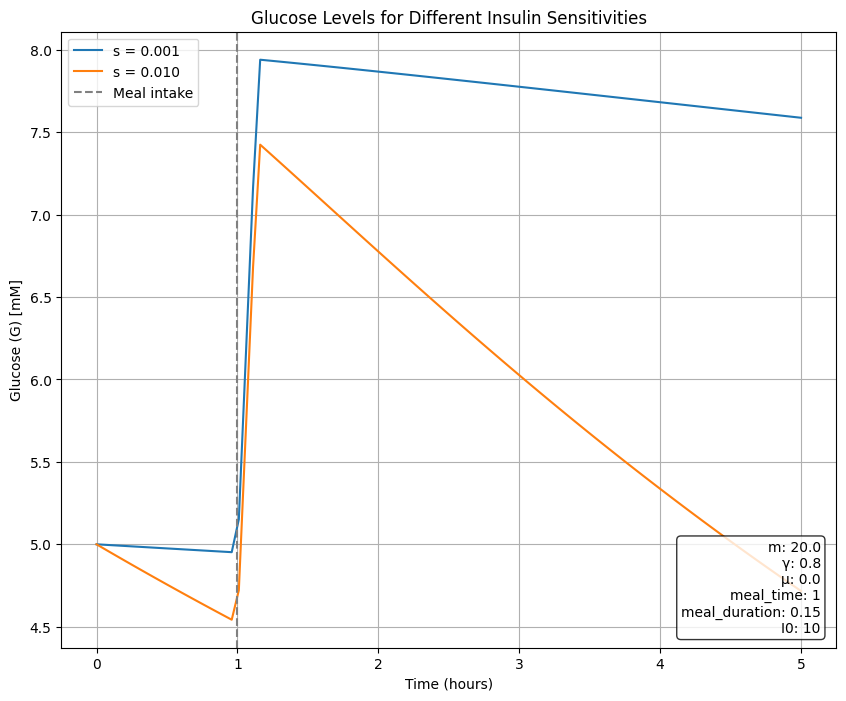

In [53]:
#@title Insulin sensitivity
run_BIG_simulation_analysis(m=20.0, gamma=0.8, mu=0.0, meal_time=1, meal_duration=0.15, I0=10)

### Multi-day simulation of the $\beta$IG model
This is a simulation over five days. We need to get this perspective, because the dynamical compensation takes several days to build up, since it is based on ramping up the production of $\beta$-cells in the pancreas.

Again, make sure you understand the parameters involved. Notice that the function `run_extended_simulation`  can be used to set up a simulation with two $s$ values. You will need to do that to illustrate that the system depends on $s$ throughout the five days.

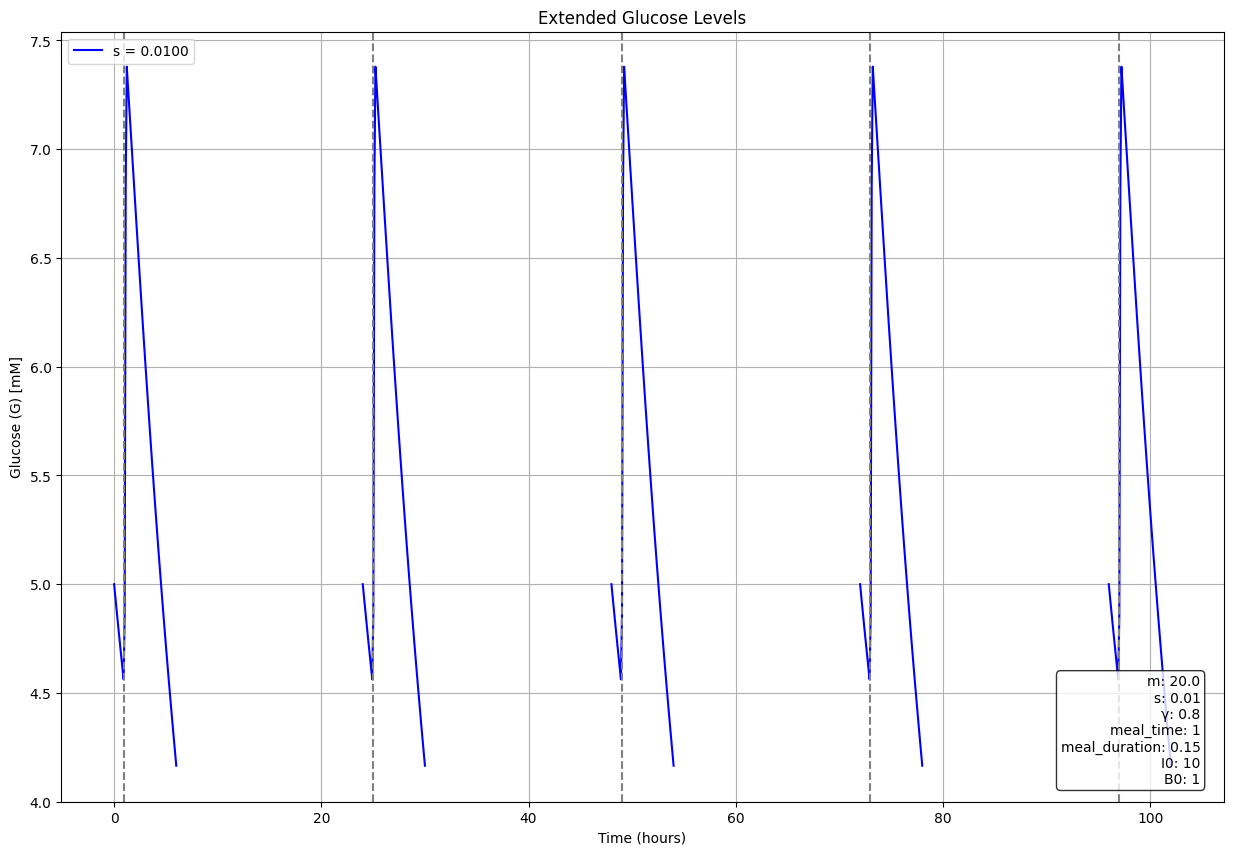

In [52]:
#@title Multi-day simulation
run_extended_simulation(m=20.0, s_values=[s_optimal], gamma=0.8, meal_time=1, meal_duration=0.15, I0=10, B0=1, num_days=5)

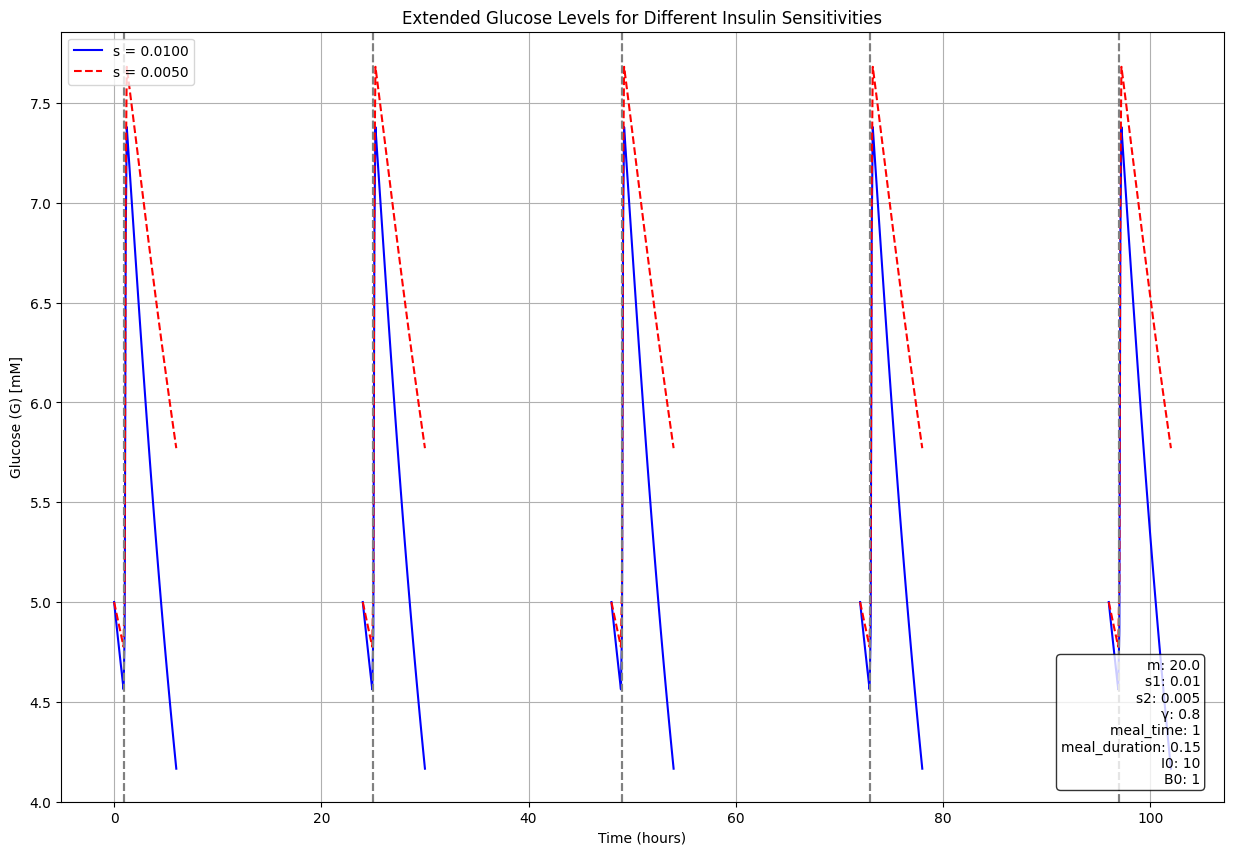

In [51]:
#@title Multi-day simulation with insulin resistance
run_extended_simulation_s(m=20.0, s_values=[s_optimal, s_resistant], gamma=0.8, meal_time=1, meal_duration=0.15, I0=10, B0=1, num_days=5)

### Multi-day simulation of the $\beta$IG model with dynamic compensation
To simulate dynamical compensation through an increase in beta-cell functional mass (represented by $B$) over five days, we can adjust $B$ gradually in each simulation. The goal is to test how increasing $B$ helps compensate for lower insulin sensitivity (represented by $s_{\text{resistant}}$).

We'll simulate with $s = s_{\text{resistant}}$ and vary $B$ from $B_0$ (with $\mu = 0$, meaning no growth) up to $B_0 \times \frac{s_{\text{optimal}}}{s_{\text{resistant}}}$ (representing a compensatory increase in $\beta$-cell mass).

The growth rate of $\beta$-cells ($\mu$) can be set to achieve the target $B$ over five days. To do this, we'll calculate \mu based on the desired growth and incorporate this into the simulation.

In this setup, `compensation_simulation` calculates the required growth rate $\mu$ to increase $B$ from \B_0 to the target $B$ over five days. Each day's simulation updates $B$ based on this growth rate. This model will allow you to observe the effect of increasing beta-cell mass in compensating for reduced insulin sensitivity.

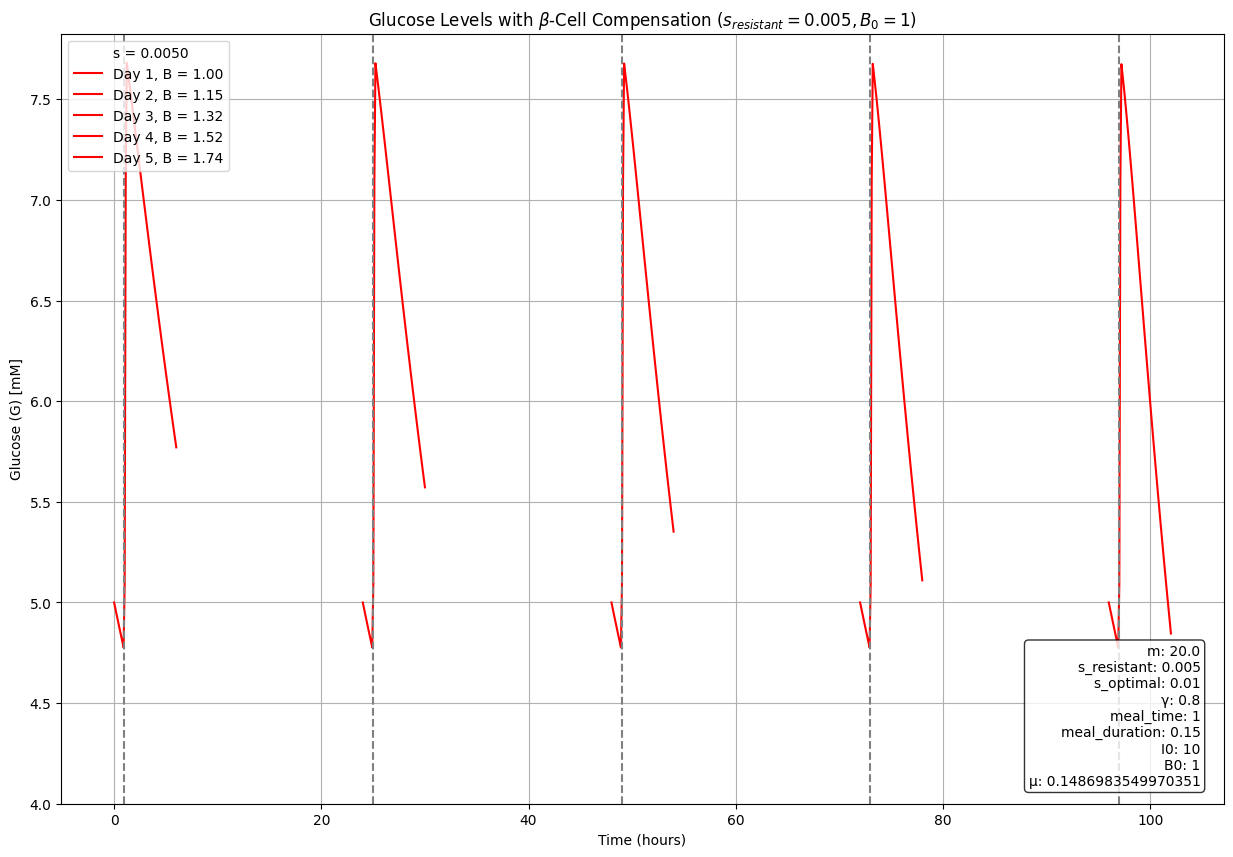

In [50]:
#@title Multi-day with dynamic compensation
# Example usage with s_resistant over 5 days and compensatory beta-cell growth
s_optimal = 0.01  # Optimal insulin sensitivity
s_resistant = 0.005  # Lower insulin sensitivity
compensation_simulation(m=20.0, s_resistant=s_resistant, s_optimal=s_optimal, gamma=0.8, meal_time=1, meal_duration=0.15, I0=10, B0=1, num_days=5)

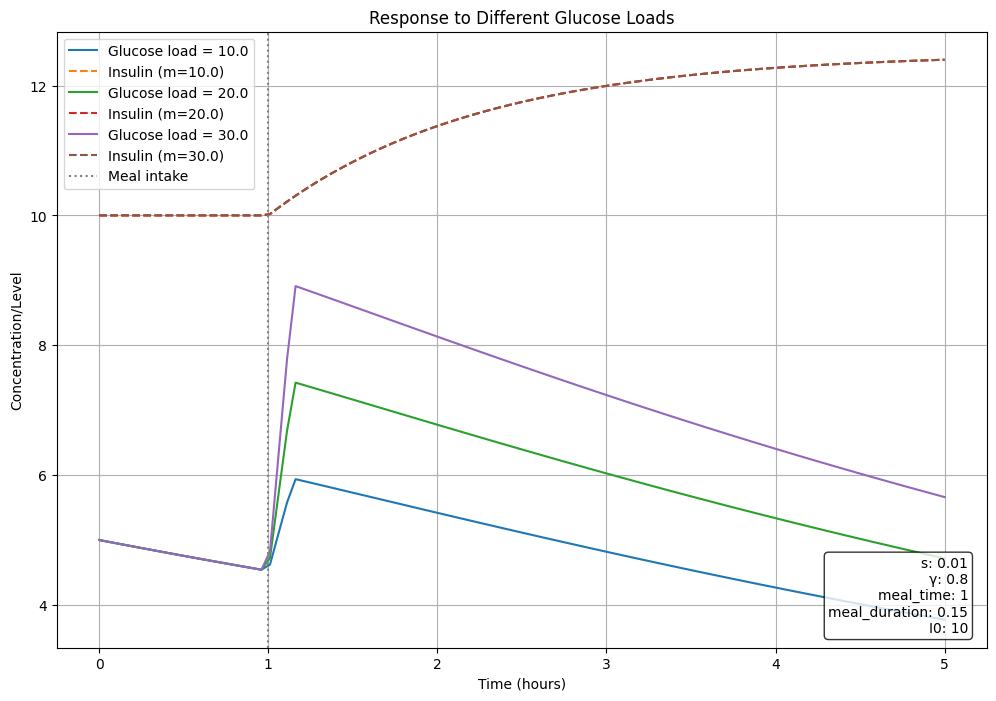

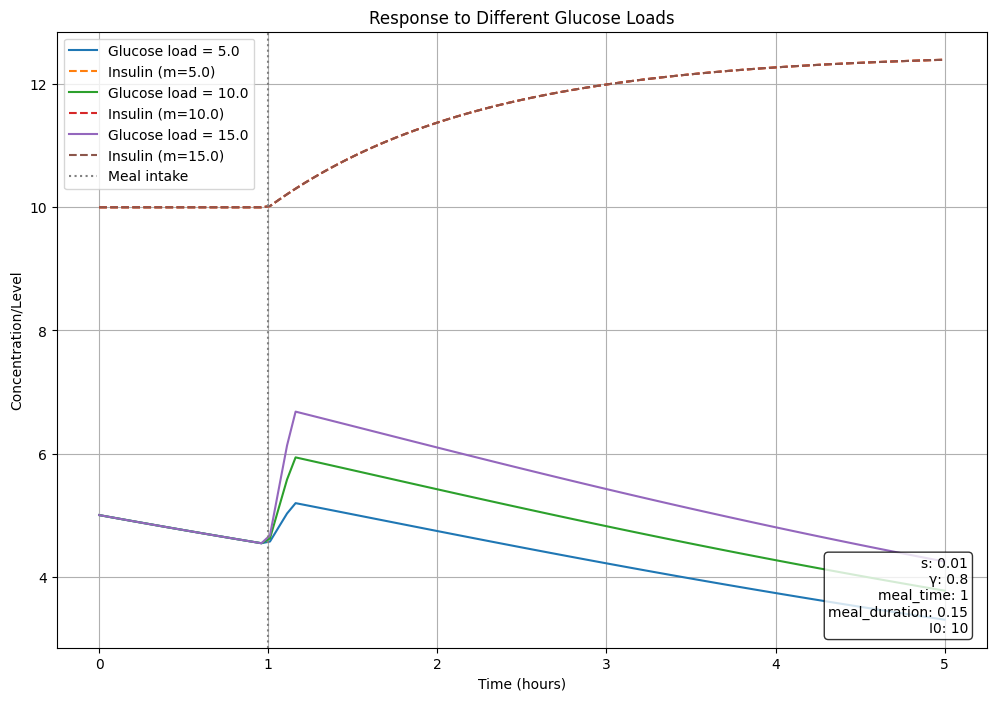

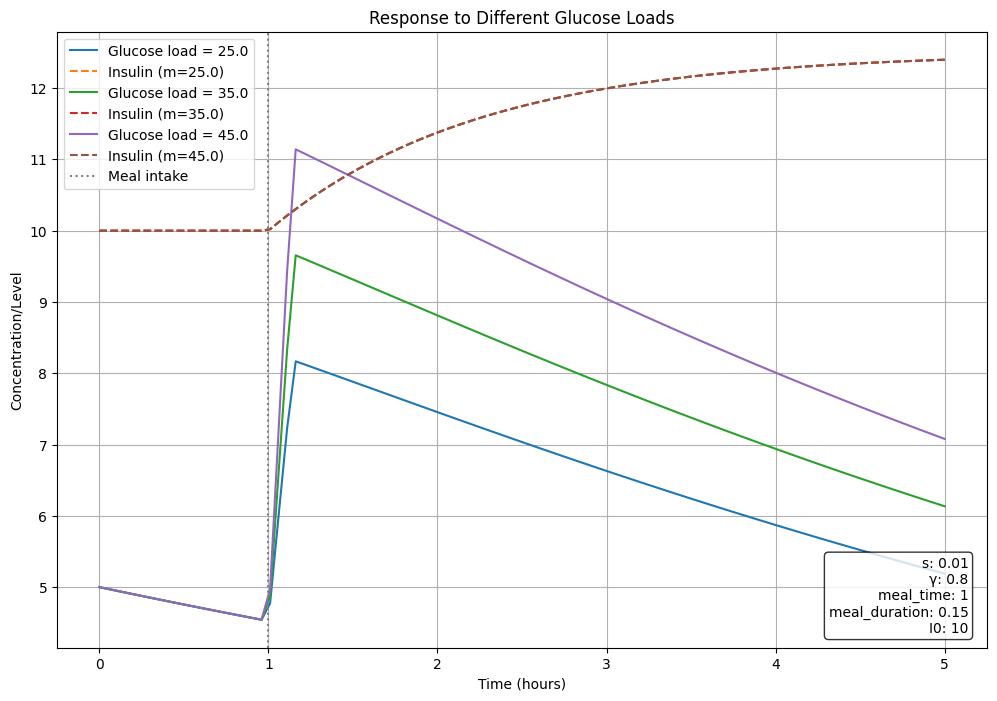

In [58]:
def compare_glucose_loads(loads=[10.0, 20.0, 30.0], s=0.01, gamma=0.8, meal_time=1, meal_duration=0.15, I0=10):
    plt.figure(figsize=(12, 8))

    for m in loads:
        G0 = 5.0  # Initial glucose
        B0 = 1.0  # Initial beta cells
        t = np.linspace(0, 5, 100)

        solution = odeint(BIG_model, [G0, I0, B0], t,
                         args=(m, s, B0, gamma, 0, meal_time, meal_duration, I0))

        plt.plot(t, solution[:, 0], label=f'Glucose load = {m}')
        plt.plot(t, solution[:, 1], '--', label=f'Insulin (m={m})')

    params = {
        's': s,
        'γ': gamma,
        'meal_time': meal_time,
        'meal_duration': meal_duration,
        'I0': I0
    }
    add_param_box(plt, params)

    plt.xlabel('Time (hours)')
    plt.ylabel('Concentration/Level')
    plt.title('Response to Different Glucose Loads')
    plt.axvline(x=meal_time, color='grey', linestyle=':', label='Meal intake')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Run three simulations
# 1. Normal range
compare_glucose_loads([10.0, 20.0, 30.0])
# 2. Low range
compare_glucose_loads([5.0, 10.0, 15.0])
# 3. High range
compare_glucose_loads([25.0, 35.0, 45.0])

#### **Exercise. Exploring Glucose Regulation with the BIG Model**

#### Part 1: Basic Glucose-Insulin Dynamics
1. Run the basic BIG model simulation with the default parameters:
```python
run_BIG_simulation(m=20.0, s=0.01, gamma=0.8, mu=0, meal_time=1, meal_duration=0.15, I0=10)
```
- Observe how glucose and insulin levels change after a meal
- Note the peak glucose level and how long it takes to return to baseline

2. Explore insulin clearance by making small changes to gamma (try 0.7 and 0.9):
```python
run_BIG_simulation(m=20.0, s=0.01, gamma=0.7, mu=0, meal_time=1, meal_duration=0.15, I0=10)
```
- Compare how different gamma values affect insulin duration in the bloodstream
- Note the impact on glucose clearance

#### Part 2: Insulin Sensitivity Analysis
3. Compare two insulin sensitivity values using:
```python
run_BIG_simulation_analysis(m=20.0, gamma=0.8, mu=0.0, meal_time=1, meal_duration=0.15, I0=10)
```
- Observe how different insulin sensitivities affect glucose handling
- Pay attention to peak glucose levels and recovery time

#### Part 3: Long-term Dynamics
4. Run the five-day simulation with normal insulin sensitivity:
```python
run_extended_simulation(m=20.0, s_values=[0.01], gamma=0.8, meal_time=1, meal_duration=0.15, I0=10, B0=1, num_days=5)
```
- Note the consistency of glucose responses across days

5. Compare normal and reduced insulin sensitivity:
```python
run_extended_simulation_s(m=20.0, s_values=[0.01, 0.005], gamma=0.8, meal_time=1, meal_duration=0.15, I0=10, B0=1, num_days=5)
```
- Observe the differences in glucose handling between normal and reduced sensitivity
- Pay attention to recovery patterns

#### Part 4: Beta-cell Compensation
6. Observe beta-cell compensation:
```python
compensation_simulation(m=20.0, s_resistant=0.005, gamma=0.8, meal_time=1, meal_duration=0.15, I0=10, B0=1, num_days=5, s_optimal=0.01)
```
- Note how increasing beta-cell mass affects glucose control over time
- Compare final day glucose levels with initial day


